In [2]:
from mmap import ALLOCATIONGRANULARITY

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib.ticker import FormatStrFormatter

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/andriygav/MachineLearningSeminars/master/sem1/data/iris.csv', 
                      header=None, 
                      names=['длина чашелистика', 'ширина чашелистика', 
                             'длина лепестка', 'ширина лепестка', 'класс'])
dataset.sample(5, random_state=0)

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс
114,5.8,2.8,5.1,2.4,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa


In [4]:
print(dataset.describe())

       длина чашелистика  ширина чашелистика  длина лепестка  ширина лепестка
count         150.000000          150.000000      150.000000       150.000000
mean            5.843333            3.054000        3.758667         1.198667
std             0.828066            0.433594        1.764420         0.763161
min             4.300000            2.000000        1.000000         0.100000
25%             5.100000            2.800000        1.600000         0.300000
50%             5.800000            3.000000        4.350000         1.300000
75%             6.400000            3.300000        5.100000         1.800000
max             7.900000            4.400000        6.900000         2.500000


In [6]:
dataset.columns

Index(['длина чашелистика', 'ширина чашелистика', 'длина лепестка',
       'ширина лепестка', 'класс'],
      dtype='object')

In [21]:
dataset.head(10)


,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [18]:
values = ((dataset.isna().sum() / len(dataset)) * 100).sort_values()
print(values)
count = 0
for i in values:
    if i == 0:
        count += 1
print(f'Количество полностью заполненных объектов - {count}')
print(f'Их процент из всей выборки - {int(count / len (values) * 100)}%')
for colomn in dataset.columns:
    print(f"unique values in {colomn} : {dataset[colomn].nunique()}")

длина чашелистика     0.0
ширина чашелистика    0.0
длина лепестка        0.0
ширина лепестка       0.0
класс                 0.0
dtype: float64
Количество полностью заполненных объектов - 5
Их процент из всей выборки - 100%
unique values in длина чашелистика : 35
unique values in ширина чашелистика : 23
unique values in длина лепестка : 43
unique values in ширина лепестка : 22
unique values in класс : 3


In [22]:
not_missing_columns = values[values.values == 0].index.tolist()
print(f'Количество полностью заполненных объектов - {len(not_missing_columns)}')
print(f'Их процент из всей выборки - {int(len(not_missing_columns) / len (values) * 100)}%')

Количество полностью заполненных объектов - 5
Их процент из всей выборки - 100%


In [24]:
not_missing_object = dataset.dropna(axis=0, how='any').index.tolist()
print(f'Количество полностью заполненных объектов - {len(not_missing_object)}')
print(f'Их процент из всей выборки - {int(len(not_missing_object) / len(dataset) * 100)}%')

Количество полностью заполненных объектов - 150
Их процент из всей выборки - 100%


Загружен набор данных, немного исследован

Здесь вывожу попарные отношения: диагональные элементы показывают насколько данные адекватные?

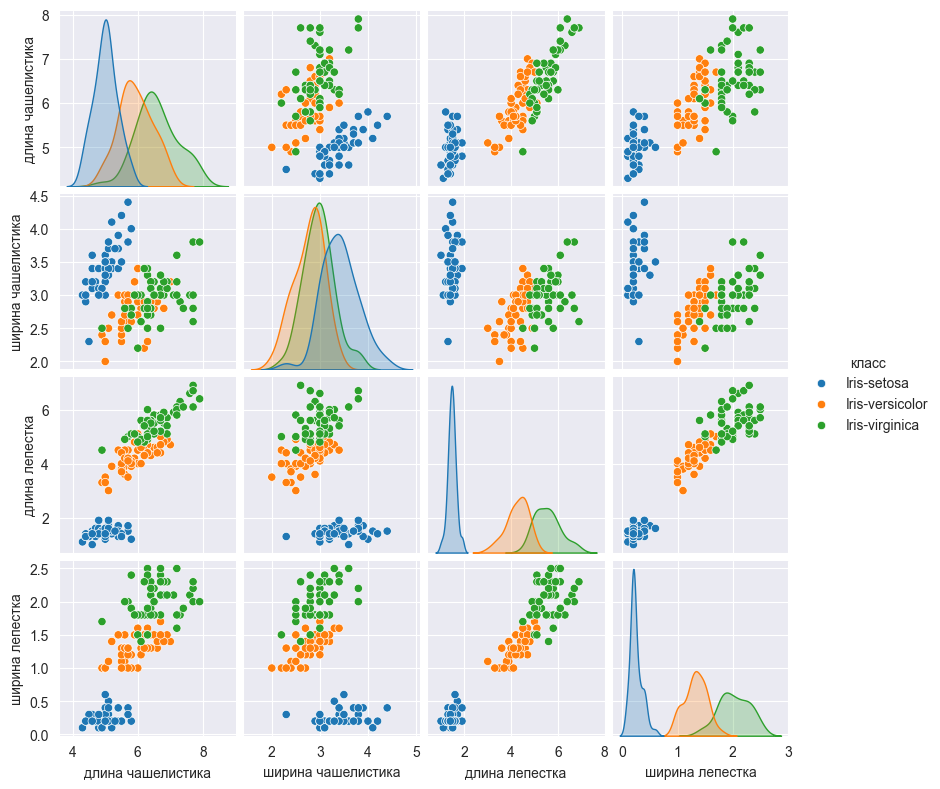

In [32]:
sns.pairplot(dataset, hue='класс', height=2)
plt.show()

Хочу сначала разбить на 2 класса, поэтому один дропаю. Другим присваиваю значние +1 и -1. Потом разделяю данные на матрицу признаков и целевую переменную

In [33]:
#Классификация на 2 класса:
binary_dataset = dataset.drop(index=dataset.index[dataset['класс'] == 'Iris-virginica'])
binary_dataset.loc[dataset['класс'] == 'Iris-versicolor', dataset.columns == 'класс'] = -1
binary_dataset.loc[dataset['класс'] == 'Iris-setosa', dataset.columns == 'класс'] = 1


In [44]:
X = binary_dataset.iloc[:, binary_dataset.columns != 'класс'].values#преобразует данные в массив numpy
y = binary_dataset.iloc[:, binary_dataset.columns == 'класс'].values.reshape(-1)
X = np.array(np.hstack([X, np.ones([len(X), 1])]), dtype=np.float64)
y = np.array(y, dtype=np.int64)
model = LogisticRegression(random_state=0, max_iter=2000)#тут  мы как бы говорим, что за объект
_ = model.fit(X, y)#тут идет само решение как бы
print(model.coef_)

[[-0.43781365  0.89664519 -2.31320745 -0.96604529  0.00853073  0.00853073]]


Заменил Х и У массивами со значениями, удалил предварительно поле класса из Х. Потом добавил массив 1 в Х пока не понял зачем и посчитал коэффициенты. Что с ними дальше делать пока не понял
Еще ФФ: если уберу один строку, где добавляется столбец х будет 4 элемента в ответе, а если добавить то 6. Хз что с этим делать
 

In [36]:
model.coef_


array([[-0.4422644 ,  0.9022322 , -2.311074  , -0.96616065,  0.00693174]])

Переход от бинарной классификации к многоклассовой - One VS ALL

In [52]:
np.random.seed(0)
l = 100
n = 2
X1 = np.array([[-1,-1]]) + 0.5*np.random.randn(l, n)
X2 = np.array([[1,1]]) + 0.5*np.random.randn(l, n)
X3 = np.array([[-1,1]]) + 0.5*np.random.randn(l, n)
#тут кароче вот какой прикол: мы создаем 3 массива и объединяем в один Х
#и тут же создаем y который одномерный. Хз как, но к строке в массиве х прикрепляется метка и мы потом можем по этой метке достать значение
#я не понял, как эти метки привязываются и как ими управлять вообще. 
#Я разобрался: когда случается условие 
X = np.vstack([X1, X2, X3])
y = np.hstack([[0]*l, [1]*l, [2]*l])

# print(y, y.shape)
# print(X, X.shape)

[[-0.11797383 -0.7999214 ]
 [-0.51063101  0.1204466 ]
 [-0.066221   -1.48863894]
 [-0.52495579 -1.0756786 ]
 [-1.05160943 -0.79470075]
 [-0.92797821 -0.27286325]
 [-0.61948114 -0.93916249]
 [-0.77806838 -0.83316284]
 [-0.25296046 -1.10257913]
 [-0.84346615 -1.42704787]
 [-2.27649491 -0.6731907 ]
 [-0.5677819  -1.37108251]
 [ 0.13487731 -1.72718284]
 [-0.97712074 -1.09359193]
 [-0.23361039 -0.26532062]
 [-0.92252629 -0.81091874]
 [-1.44389287 -1.99039823]
 [-1.17395607 -0.92182552]
 [-0.38485466 -0.39881008]
 [-1.19366341 -1.15115138]
 [-1.52427648 -1.71000897]
 [-1.8531351  -0.0246123 ]
 [-1.25482609 -1.21903715]
 [-1.62639768 -0.61125482]
 [-1.80694892 -1.10637014]
 [-1.44773328 -0.80654875]
 [-1.25540257 -1.59031609]
 [-1.01409111 -0.78583406]
 [-0.96674139 -0.84876405]
 [-1.31716105 -1.18137058]
 [-1.33623022 -1.17977658]
 [-1.40657314 -1.8631413 ]
 [-0.91128693 -1.20089047]
 [-1.81509917 -0.76860887]
 [-1.45364918 -0.9740273 ]
 [-0.63545472 -0.93550854]
 [-0.43029966 -1.61741291]
 

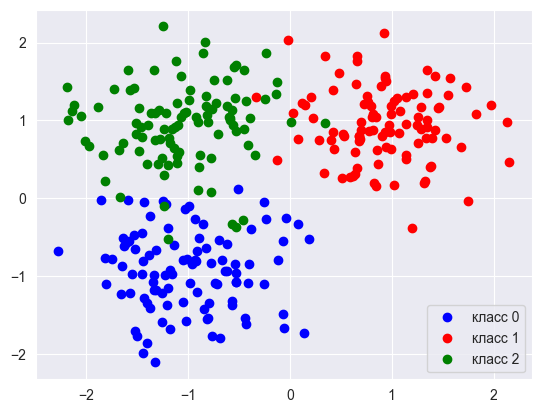

In [53]:
cols = ['blue', 'red', 'green']
print(X[y==0])
# построение точек
for k in np.unique(y):
    plt.plot(X[y==k,0], X[y==k,1], 'o', label='класс {}'.format(k), color=cols[k])


plt.legend(loc='best')
plt.show()

Как раз тут будет реализован принцип один против всех

In [61]:
models = []
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y==0, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y == 1, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y == 2, dtype=np.int64))
models.append(model)
print(np.unique(y), len(models), models)


[0 1 2] 3 [LogisticRegression(max_iter=2000, random_state=0), LogisticRegression(max_iter=2000, random_state=0), LogisticRegression(max_iter=2000, random_state=0)]


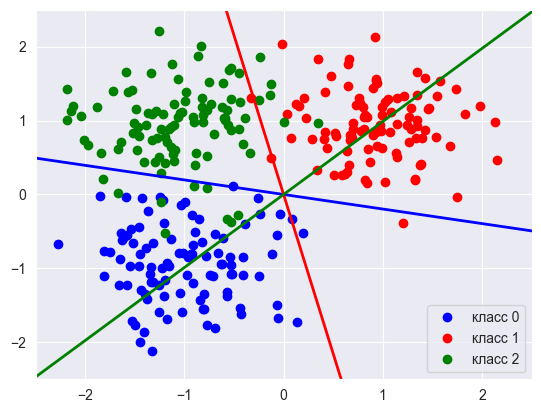

In [64]:
cols = ['blue', 'red', 'green']
plt.xlim((-2.5, 2.5))
plt.ylim((-2.5, 2.5))

# построение точек
for k in np.unique(y):
    plt.plot(X[y==k,0], X[y==k,1], 'o', label='класс {}'.format(k), color=cols[k])

# построение прямой, перпендикулярной к разделяющей
for k in np.unique(y):
    # нормальный вектор к прямой
    x2, y2 = -models[k].coef_[0][1]/models[k].coef_[0][0], 1

    polynomial = np.poly1d(np.polyfit([0, x2], [0, y2], 1))
    x_axis = np.linspace(-10, 10)
    y_axis = polynomial(x_axis)
    plt.plot(x_axis, y_axis, linewidth=2, color=cols[k])

plt.legend(loc='best')
plt.show()

Проверим ошибку:


In [65]:
scores = np.zeros([3,3])
for k in range(3):
    pred = np.argmax(np.vstack([models[i].predict_proba(X[y==k])[:, 1] for i in range(3)]).T, axis=1)
    for i in range(3):
        scores[i, k] = sum(pred == i)
print(scores)

[[98.  0.  6.]
 [ 0. 98.  2.]
 [ 2.  2. 92.]]


Результаты данной таблицы показывают такой же результат, как и картинка. Хуже всего от других отделим второй класс.